# DBSCAN

### Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Reading and Exploring our Data


In [6]:
# read the data
df = pd.read_csv("Fish.csv")

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
# select just the height and width columns
df = df[["Height", "Width"]]

<Axes: xlabel='Height', ylabel='Width'>

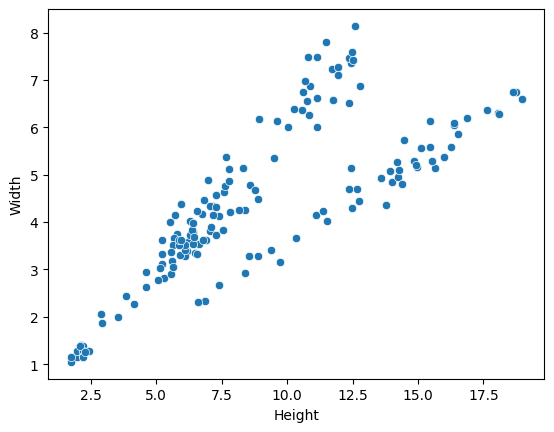

In [8]:
sns.scatterplot(data=df, x="Height", y="Width")


### MinPoints and Epsilon Selection


- We select minPoints to be 4 in this case as we are dealing with a 2 dimensional dataset, as suggested by the literature. For larger datasets we can use 2*dim where dim is the number of dimensions of the dataset.

- For selecting a value for epsilon, we plot the distance each data point is away to its k nearest neighbour. k in this case being the number of minPoints. We then select the epsilon value that is located at the elbow of the plot. This indicates a distance, where going beyond this distance, the epsilon value could be overlapping with a different cluster.

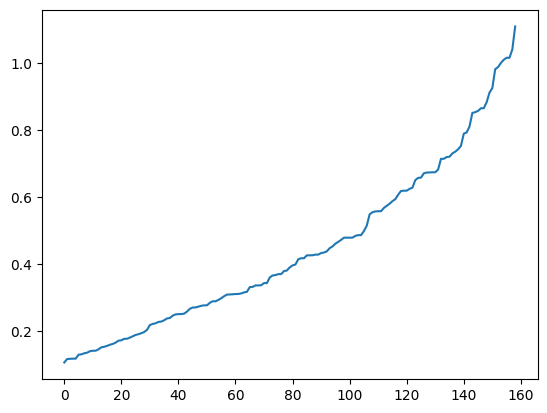

In [9]:
from sklearn.neighbors import NearestNeighbors

# implement k nearest neighbours
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df)

# extract distances and indices of data points
distances, indices = neighbors_fit.kneighbors(df)

# sort distances to kth nearest neighbour by ascending value
distances = np.sort(distances, axis=0)
distances = distances[:, 3] 

# plot distances
plt.plot(distances)

### Implement DBSCAN Algorithm


In [10]:
from sklearn.cluster import DBSCAN

# apply dbscan algorithm
dbscan = DBSCAN(eps=0.5, min_samples=4).fit(df)

# extract labels
labels = dbscan.labels_

# add clusters to original dataframe
df["Cluster"] = labels

<Axes: xlabel='Height', ylabel='Width'>

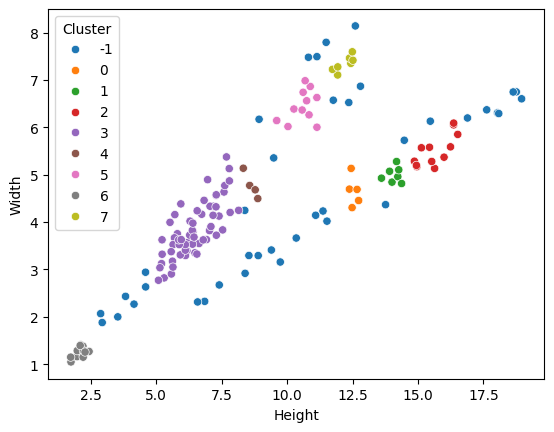

In [11]:
sns.scatterplot(x='Height', y='Width', hue='Cluster', palette = "tab10", data=df)


### Exploring the Clusters


In [12]:
# extract the mean height, mean width and count of each cluster
cluster_stats = df.groupby("Cluster").mean()
cluster_counts = df.groupby("Cluster").count()
cluster_stats["Count"] = cluster_counts["Height"]

# rename columns
cluster_stats.columns = ["Mean Height", "Mean Width", "Count"]

# display dataframe
cluster_stats

,Mean Height,Mean Width,Count
Cluster,,,
-1,10.692859,4.713131,39
0,12.540360,4.656240,5
1,14.080071,5.000100,7
2,15.662325,5.514267,12
3,6.448038,3.837645,60
4,8.636450,4.772325,4
5,10.507100,6.425783,12
6,2.095246,1.247915,13
7,12.200686,7.347814,7
